In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
problem_name = 'benchmark'
base_directory = '../report'

In [3]:
schemes = ['1_LSCHEME', '2_LSCHEME', 'NEWTON', 'PICARD']
directories = [os.path.join(base_directory, problem_name + '_' + scheme) for scheme in schemes]

In [4]:
scheme_dictionary = {}
scheme_iterations = {}
scheme_time = {}

In [6]:
for directory in directories:
    files = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))
    
    scheme = directory.replace(os.path.join(base_directory, problem_name + '_'), '')
    scheme_dictionary[scheme] = []

    print('Pattern ' + os.path.join(directory, '*_' + problem_name +'*.csv') + ' matched with ' + str(len(files)) + ' files of scheme ' + scheme)

    for file in files:
        scheme_dictionary[scheme].append( file )
    
    scheme_dictionary[scheme].sort()

Pattern ../report/benchmark_1_LSCHEME/*_benchmark*.csv matched with 8 files of scheme 1_LSCHEME
Pattern ../report/benchmark_2_LSCHEME/*_benchmark*.csv matched with 8 files of scheme 2_LSCHEME
Pattern ../report/benchmark_NEWTON/*_benchmark*.csv matched with 8 files of scheme NEWTON
Pattern ../report/benchmark_PICARD/*_benchmark*.csv matched with 8 files of scheme PICARD


In [7]:
for scheme in scheme_dictionary:
    scheme_iterations[scheme] = []

    for file in scheme_dictionary[scheme]:
        with open(file, 'r') as csvfile:
            lines = csv.reader(csvfile, delimiter=',')
            scheme_iterations[scheme].append(sum(1 for row in lines))

            print('Scheme ' + scheme + ' has ' + str(scheme_iterations[scheme][-1]) + ' iterations!')

Scheme 1_LSCHEME has 77 iterations!
Scheme 1_LSCHEME has 63 iterations!
Scheme 1_LSCHEME has 60 iterations!
Scheme 1_LSCHEME has 56 iterations!
Scheme 1_LSCHEME has 56 iterations!
Scheme 1_LSCHEME has 56 iterations!
Scheme 1_LSCHEME has 54 iterations!
Scheme 1_LSCHEME has 54 iterations!
Scheme 2_LSCHEME has 85 iterations!
Scheme 2_LSCHEME has 72 iterations!
Scheme 2_LSCHEME has 67 iterations!
Scheme 2_LSCHEME has 66 iterations!
Scheme 2_LSCHEME has 65 iterations!
Scheme 2_LSCHEME has 64 iterations!
Scheme 2_LSCHEME has 63 iterations!
Scheme 2_LSCHEME has 62 iterations!
Scheme NEWTON has 35 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 33 iterations!
Scheme NEWTON has 32 iterations!
Scheme NEWTON has 32 iterations!
Scheme NEWTON has 32 iterations!
Scheme NEWTON has 32 iterations!
Scheme PICARD has 65 iterations!
Scheme PICARD has 63 iterations!
Scheme PICARD has 60 iterations!
Scheme PICARD has 59 iterations!
Scheme PICARD has 58 iterati

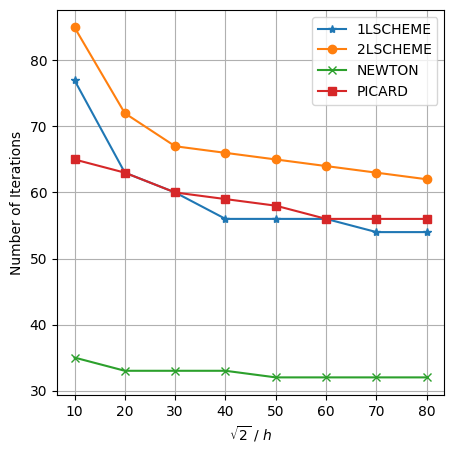

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
names = []
symbols = ['-*', '-o', '-x', '-s']

for scheme, symbol in zip(scheme_iterations, symbols):

    values = scheme_iterations[scheme]

    ax.plot(range(10, 10*len(values)+1, 10), values, symbol)
    ax.set_ylabel('Number of Iterations')
    ax.set_xlabel('$\sqrt{2}$ / $h$')

    names.append(scheme.replace('_', ''))

ax.legend(names)
ax.grid()